# Activity: Run simple linear regression

## Introduction

In this lab, you will explore a marketing and sales dataset and conduct simple linear regression. Linear regression is one of the approaches for modeling the relationship between two variables. This activity will deepen your understanding of linear regression and prepare you for future scenarios where you will use regression to draw insights about the relationship between variables.

For this activity, imagine that you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between radio promotion budget and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on your analysis, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between types of marketing and the revenue they generate.

## Step 1. Imports

### Import relevant packages.

In this section, you will start by importing relevant libraries and modules.

In [1]:
# Import relevant Python libraries and modules

### YOUR CODE HERE #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm



### Now load the dataset into a DataFrame. 

The dataset provided is a csv file (named `marketing_sales_data.csv`) containing information about promotional marketing conducted in collaboration with influencers, along with the corresponding sales. This is a fictional dataset that was created for educational purposes and modified for this lab. Assume that the numerical variables in the data are expressed in millions of dollars.

In [2]:
# Load the dataset into a DataFrame and save in a variable

### YOUR CODE HERE ###
sales_data = pd.read_csv("marketing_sales_data.csv")


<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

You may refer back to what you learned about loading data in Python.

</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

There is a function in the `pandas` library that allows you to read data from a csv file and load the data into a DataFrame.
 

</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

Use the `read_csv()` function from the `pandas` library. 

</details>

## Step 2. Data exploration

### Start to learn about the data by displaying the first 10 rows of the data.

In [5]:
# Display the first 10 rows of the data

### YOUR CODE HERE ###
sales_data.head(10)


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
5,Low,5.561586,3.530209,Nano,39.992087
6,Medium,13.951808,4.477142,Micro,147.150178
7,Medium,28.352592,4.695376,Mega,229.141912
8,Medium,15.322175,4.379750,Macro,222.696768
9,High,26.914287,6.074165,Mega,322.466797


<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

You may find it helpful to refer back to what you learned about exploring datasets in Python.

</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to get a specific number of rows from the top of a dataframe.
 

</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

Use the `head()` function from the `pandas` library. 

</details>

#### **Question 1**: What do you observe about the different variables included in the data?


Double-click (or enter) to edit
- Some values are categorical that is are in object form and others are in numerical form


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         572 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


### To learn about the data, identify the number of rows and the number of columns in the data.

In [8]:
# Display number of rows, number of columns

### YOUR CODE HERE ###
sales_data.shape

(572, 5)

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

You may find it helpful to refer back to what you learned about exploring datasets in Python.

</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

There is a property that every DataFrame in `pandas` has; it gives you access to the number of rows and the number of columns as a tuple.

</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

Use the `shape` property.

</details>

#### **Question 2**: What do you observe about the number of rows and number of columns in the data?

Double-click (or enter) to edit

### Check for missing values in the rows of the data.
This is an important check since missing values are not that meaningful when modeling the relationship between two variables.

In [11]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing

### YOUR CODE HERE ###
sales_data.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

If you would like to read more about the `isna()` function, refer to its documentation in the references section of this lab.

In [12]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row

### YOUR CODE HERE ###
sales_data.isna().any(axis=1)


0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

If you would like to read more about the `any()` function, refer to its documentation in the references section of this lab.

In [13]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values

### YOUR CODE HERE ###
sales_data.isna().any(axis=1).sum()

0

If you would like to read more about the `sum()` function, refer to its documentation in the references section of this lab.

#### **Question 3**: What do you observe about the number of rows containing missing values?

Double-click (or enter) to edit

### Drop the rows that contain missing values.
This is an important step in data cleaning since it makes the data more usable for the analysis and regression that you will conduct next.

In [15]:
# Step 1. Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped
# Step 2. To update the DataFrame, reassign it to the result

### YOUR CODE HERE ###
sales_data.dropna(axis=0)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266
568,High,28.110171,7.358169,Mega,297.626731
569,Medium,11.401084,5.818697,Nano,145.416851
570,Medium,21.119991,5.703028,Macro,209.326830


In [16]:
# Check to make sure that the data does not contain any rows with missing values now

# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values

### YOUR CODE HERE ###
sales_data.dropna(axis=1)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
...,...,...,...,...,...
567,Medium,14.656633,3.817980,Micro,191.521266
568,High,28.110171,7.358169,Mega,297.626731
569,Medium,11.401084,5.818697,Nano,145.416851
570,Medium,21.119991,5.703028,Macro,209.326830


### Check model assumptions.
You would like to explore the relationship between radio promotion budget and sales. You could model the relationship using linear regression. To do this, you want to check if the model assumptions for linear regression can be made in this context. Some of the assumptions can be addressed before the model is built --- you will address those in this section. After the model is built, you can finish checking the assumptions.

### Start by creating a plot of pairwise relationships in the data.
This will help you visualize the relationships between variables in the data and help you check model assumptions. 

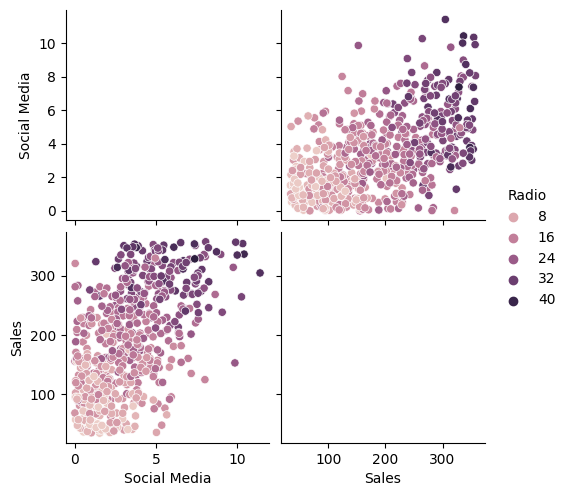

In [18]:
# Create plot of pairwise relationships

### YOUR CODE HERE ###
sns.pairplot(sales_data,hue="Radio")


<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned about creating a plot that shows the 
  relationships between pairs of variables.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function in the `seaborn` library that you can call to create a plot that shows the 
  relationships between pairs of variables.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `pairplot()` function from the `seaborn` library.

</details>

#### **Question 4**: Is the assumption of linearity met?

Double-click (or enter) to edit

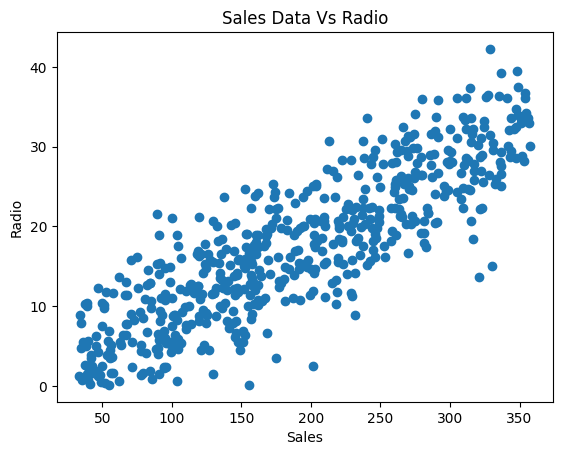

In [22]:
plt.scatter(sales_data["Sales"],sales_data["Radio"])
plt.title("Sales Data Vs Radio")
plt.xlabel("Sales")
plt.ylabel("Radio")
plt.show()

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned about checking model assumptions for linear regression.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  Use the scatter plot of `Sales` over `Radio` found in the above plot of pairwise relationships. 

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  Check the scatter plot of `Sales` over `Radio` found in the above plot of pairwise relationships. If the data points cluster around a line, that would indicate that the assumption of linearity is met. Alternatively, if the data points resemble a random cloud or a curve, then a linear model may not fit the data well.  

</details>

## Step 3. Model building

### Start by selecting only the columns that are needed for the model that you will build from the data.

In [24]:
# Select relevant columns
# Save resulting DataFrame in a separate variable to prepare for regression
ols_data = sales_data[["Sales","Radio"]]
ols_data
### YOUR CODE HERE ###


,Sales,Radio
0,55.261284,3.518070
1,67.574904,7.756876
2,272.250108,20.348988
3,195.102176,20.108487
4,273.960377,31.653200
...,...,...
567,191.521266,14.656633
568,297.626731,28.110171
569,145.416851,11.401084
570,209.326830,21.119991


<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned about selecting multiple columns from a DataFrame.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  Use two pairs of square brackets around the names of the columns that should be selected.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  Make sure to column names are spelled exactly as they are in the data.

</details>

### Display the first 10 rows of the new DataFrame to ensure it looks right.

In [25]:
# Display first 10 rows of the new DataFrame

### YOUR CODE HERE ###
ols_data.head(10)

,Sales,Radio
0,55.261284,3.518070
1,67.574904,7.756876
2,272.250108,20.348988
3,195.102176,20.108487
4,273.960377,31.653200
5,39.992087,5.561586
6,147.150178,13.951808
7,229.141912,28.352592
8,222.696768,15.322175
9,322.466797,26.914287


<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned about displaying contents of a DataFrame.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function in the `pandas` library that allows you to display the first n number of rows of a DataFrame, where n is a number of your choice.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  Call the `head()` function from the `pandas` library and pass in the number of rows from top that you want to display. 

</details>

### Write the linear regression formula for modeling the relationship between the two variables of interest.

In [26]:
# Write the linear regression formula
# Save it in a variable

### YOUR CODE HERE ###
ols_formula = "Sales ~ Radio"


<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned where model building for linear regression is discussed. 

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  Save the formula as string.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  Use a tilde to separate the y variable from the x variable so that the computer understands which is which. Make sure the spelling of each variable exactly matches the corresponding column from the data.

</details>

### Implement the Ordinary Least Squares (OLS) approach for linear regression.

In [28]:
# Implement OLS

### YOUR CODE HERE ###
regression_data = ols(formula = ols_formula, data = ols_data)
regression_data

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned where model building for linear regression is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to implement OLS.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `ols()` function from the `statsmodels` library.

</details>

### Create a linear regression model for the data and fit the model to the data.

In [30]:
# Fit the model to the data
# Save the fitted model in a variable

### YOUR CODE HERE ###
model = regression_data.fit()
model

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned where model building for linear regression is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to fit the model.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `fit()` function from the `statsmodels` library.

</details>

## Step 4. Results and evaluation

### Get a summary of the results from the model.

In [31]:
# Get summary of results

### YOUR CODE HERE ###
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1591.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          4.38e-167
Time:                        12:08:52   Log-Likelihood:                -3003.1
No. Observations:                 572   AIC:                             6010.
Df Residuals:                     570   BIC:                             6019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8789      4.126     10.635      0.000      35.775      51.983
Radio          8.2998      0.208     39.887      0.000       7.891       8.709
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.772
Skew:                           0.086   Prob(JB):                        0.680
Kurtosis:                       3.054   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned where getting model results is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to get the summary of results from a model.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `summary()` function from the `statsmodels` library.

</details>

### Take a look at the bottom table from the results summary.

Based on that table, identify the coefficients that the model determined would generate the line of best fit, the coefficients here being the y-intercept and the slope. 

#### **Question 5**: What is the y-intercept? 

Double-click (or enter) to edit

#### **Question 6**: What is the slope? 

Double-click (or enter) to edit

#### **Question 7**: What is the linear equation you would write to express the relationship between sales and radio promotion budget in the form of y = slope * x + y-intercept? 


Double-click (or enter) to edit

#### **Question 8**: What do you think the slope in this context means?

Double-click (or enter) to edit

### Finish checking model assumptions.

Now that you've built the linear regression model and fit it to the data, you can finish checking the model assumptions. This will help confirm your findings.

### Plot the OLS data with the best fit regression line.

In [ ]:
# Plot the OLS data with the best fit regression line

### YOUR CODE HERE ###


<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned where plotting the data with the best fit regression line is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be useful here.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `regplot()` function from the `seaborn` library.

</details>

#### **Question 9**: What do you observe from the regression plot above?

Double-click (or enter) to edit

### Check the normality assumption.
Get the residuals from the model.

In [ ]:
# Get the residuals from the model

### YOUR CODE HERE ###
residuals = model.resid
residuals

(array([  4.,  28.,  63., 126., 143., 112.,  70.,  20.,   3.,   3.]),
 array([-133.82610489, -104.0113353 ,  -74.19656571,  -44.38179612,
         -14.56702653,   15.24774306,   45.06251266,   74.87728225,
         104.69205184,  134.50682143,  164.32159102]),
 <BarContainer object of 10 artists>)

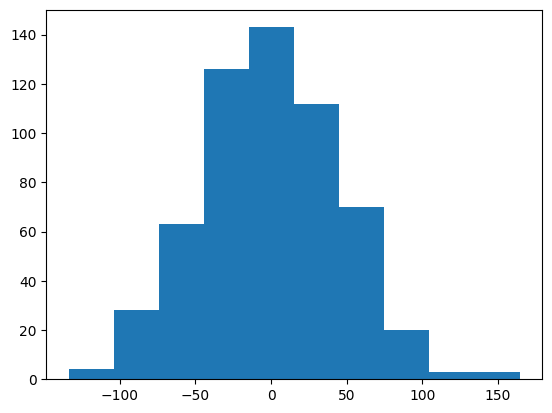

In [35]:
plt.hist(residuals)

<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned where accessing residuals is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is an attribute from the `statsmodels` library that can be called to get the residuals from a fitted model.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `resid` attribute from the `statsmodels` library.

</details>

#### Visualize the distribution of the residuals.

In [ ]:
# Visualize the distribution of the residuals

### YOUR CODE HERE ###


<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned where visualizing residuals is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a histogram.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `histplot()` function from the `seaborn` library.

</details>

#### **Question 10**: Based on the visualization above, what do you observe about the distribution of the residuals?

Double-click (or enter) to edit

### Create a Q-Q plot to confirm the assumption of normality.

In [ ]:
# Create a Q-Q plot 

### YOUR CODE HERE ###



<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned where creating a Q-Q plot is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a Q-Q plot.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `qqplot()` function from the `seaborn` library.

</details>

#### **Question 11**: Is the assumption of normality met?

Double-click (or enter) to edit

### Check the assumptions of independentobservation and homoskedasticity.

Start by getting the fitted values from the model.

In [ ]:
# Get fitted values

### YOUR CODE HERE ###


<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned where calculating fitted values is discussed.  

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `statsmodels` library that can be called to calculate fitted values from the model.

</details>

<details>
<summary><h4><strong>HINT 3</strong></h4></summary>

  You can call the `predict()` function from the `statsmodels` library. Make sure to pass in the column from `ols_data` corresponding to the x variable.

</details>

Create a scatterplot of the residuals against the fitted values.

In [ ]:
# Create a scatterplot of residuals against fitted values

### YOUR CODE HERE ###



<details>
<summary><h4><strong>HINT 1</strong></h4></summary>

  You may find it helpful to refer back to what you learned where visualizing residuals against fitted values is discussed.

</details>

<details>
<summary><h4><strong>HINT 2</strong></h4></summary>

  There is a function from the `seaborn` library that can be called to create a scatterplot.

</details>

<details>
  <summary><h4>HINT 3</h4></summary>

  You can call the `scatterplot()` function from the `seaborn` library.

</details>

#### **Question 12**: Are the assumptions of independent observation and homoskedasticity met?


Double-click (or enter) to edit

## Conclusion

**What are some key takeaways from this lab?**

Double-click (or enter) to edit

**What results can be presented from this lab?**

Double-click (or enter) to edit

**How would you frame your findings to external stakeholders?**

Double-click (or enter) to edit

**References**

Pandas.DataFrame.Any — Pandas 1.4.3 Documentation. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html.

Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html.

Pandas.Series.Sum — Pandas 1.4.3 Documentation. https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html.

Saragih, H.S. *Dummy Marketing and Sales Data*. https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data.